# Linear Regression 

### Steps to implement linear regression 

1. Calculate Mean and Variance.
2. Calculate Covariance.
3. Estimate Coefficients.
4. Make Predictions.
5. Predict Insurance.


#### Calculate Mean and Variance

mean(x) = sum(x) / count(x)

In [2]:
# Calculate the mean value of a list of numbers
def mean(values):
	return sum(values) / float(len(values))


** The variance is the sum squared difference for each value from the mean value. **


variance = sum( (x - mean(x))^2 )

In [4]:
def variance(values, mean):
	return sum([(x-mean)**2 for x in values])

In [22]:
import pandas as pd
import numpy as np

data = pd.read_csv("data.csv", dtype=np.float64)

data

,X,Y
0,108.0,392.5
1,19.0,46.2
2,13.0,15.7
3,124.0,422.2
4,40.0,119.4
5,57.0,170.9
6,23.0,56.9
7,14.0,77.5
8,45.0,214.0
9,10.0,65.3


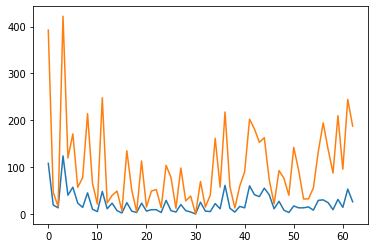

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(data)

### Scatter Plot

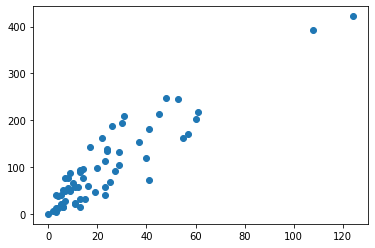

In [15]:
plt.scatter(data.iloc[:, 0:1], data.iloc[:, 1:]);


In [75]:
x = data.X.to_numpy()
y = data.T.to_numpy()[1]

mean_x, mean_y = mean(x), mean(y)

mean_x, mean_y = mean(x), mean(y)

var_x, var_y = variance(x, mean_x), variance(y, mean_y)

print('x stats: mean=%.3f variance=%.3f' % (mean_x, var_x))
print('y stats: mean=%.3f variance=%.3f' % (mean_y, var_y))

x stats: mean=22.905 variance=33809.429
y stats: mean=98.187 variance=472818.290


### Calculating Co-variance
The covariance of two groups of numbers describes how those numbers change together.
Covariance is a generalization of correlation.


 	
covariance = sum((x(i) - mean(x)) * (y(i) - mean(y)))


In [76]:
# Calculate covariance between x and y
def covariance(x, mean_x, y, mean_y):
	covar = 0.0
	for i in range(len(x)):
		covar += (x[i] - mean_x) * (y[i] - mean_y)
	return covar

In [77]:
covar = covariance(x, mean_x, y, mean_y)
print('Covariance: %.3f' % (covar))

Covariance: 115419.424


Regression Model

y = b0 + b1 * x


Calculating b1

b1 = covariance(x, y) / variance(x)

Calculating b0

 	
b0 = mean(y) - B1 * mean(x)


In [85]:
# Calculate coefficients
def coefficients(x, y):
	x_mean, y_mean = mean(x), mean(y)
	b1 = covariance(x, x_mean, y, y_mean) / variance(x, x_mean)
	b0 = y_mean - b1 * x_mean
	return b0, b1

In [88]:

b0, b1 = coefficients(x, y)

print("coefficients are b0 " + str(b0) + ' b1: ' + str(b1))


coefficients are b0 19.99448575911481 b1: 3.4138235600663664


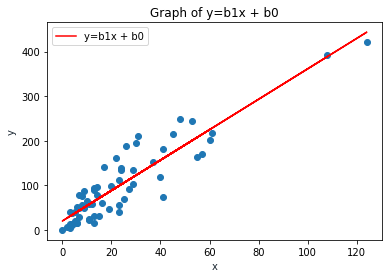

In [89]:
y = b1*x+b0
plt.scatter(data.iloc[:, 0:1], data.iloc[:, 1:]);
plt.plot(x, y, '-r', label='y=b1x + b0')
plt.title('Graph of y=b1x + b0')
plt.xlabel('x', color='#1C2833')
plt.ylabel('y', color='#1C2833')
plt.legend(loc='upper left')

In [95]:
def simple_linear_regression(train, test):
	x = data.X.to_numpy()
	y = data.T.to_numpy()[1]
	predictions = list()
	b0, b1 = coefficients(x, y)
	for row in test:
		yhat = b0 + b1 * row
		predictions.append(yhat)
	return predictions

In [99]:
prediction = simple_linear_regression(data, x)

Calculating mean square error


In [112]:
from math import sqrt
def mean_square_error(actual, predicted):
	sum_error = 0.0
	prediction_error = (predicted - actual)**2
	length = len(prediction_error)
	return sqrt(sum(prediction_error)/length)

In [113]:
mean_square_error(data.T.to_numpy()[1], prediction)

35.365829968791466

Scatterplot of predicted vs Actual


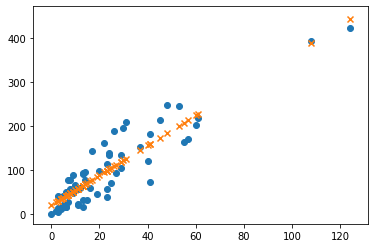

In [107]:
plt.scatter(data.iloc[:, 0:1], data.iloc[:, 1:])
plt.scatter(data.iloc[:, 0:1], prediction, marker='x')
# help(plt.scatter)